In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyRegressor

# Importing Dataset

In [2]:
partial_dfs = [ pd.read_excel("data/FinalMarksDataset.xlsx", sheet_name=i) for i in range(6) ]

In [3]:
df = pd.concat(partial_dfs)

In [4]:
df

,Unnamed: 0,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,Qz:8,S-I,S-II,Final,Proj
0,1,61.923077,86.428571,81.666667,81.00,49.166667,78.333333,70.0,33.333333,20.00,80.0,0.0,50.0,75.000000,100.0,43.733333,15.600000,35.733333,NaN
1,2,55.769231,97.142857,43.333333,70.00,67.083333,78.888889,50.0,46.666667,0.00,100.0,70.0,100.0,83.333333,100.0,31.200000,27.466667,53.488889,NaN
2,3,86.923077,88.571429,0.000000,94.00,66.666667,88.888889,70.0,16.666667,10.00,10.0,20.0,20.0,100.000000,100.0,23.733333,16.200000,32.488889,NaN
3,4,46.923077,62.142857,0.000000,44.00,0.000000,55.555556,30.0,33.333333,5.00,0.0,0.0,20.0,25.000000,0.0,46.200000,22.466667,28.000000,NaN
4,5,80.000000,95.714286,80.555556,90.00,100.000000,100.000000,100.0,70.000000,100.00,100.0,65.0,100.0,75.000000,100.0,71.200000,43.733333,74.733333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,0.000000,0.000000,0.000000,0.00,NaN,NaN,50.0,0.000000,18.75,0.0,0.0,0.0,NaN,NaN,49.133333,18.133333,23.133333,NaN
47,48,70.500000,76.666667,73.000000,76.25,NaN,NaN,15.0,70.000000,37.50,0.0,10.0,40.0,NaN,NaN,55.000000,47.200000,62.822222,NaN
48,49,41.500000,0.000000,88.000000,90.00,NaN,NaN,60.0,20.000000,37.50,0.0,0.0,30.0,NaN,NaN,57.466667,37.200000,51.488889,NaN
49,50,32.000000,80.000000,77.000000,82.50,NaN,NaN,0.0,0.000000,43.75,60.0,25.0,0.0,NaN,NaN,47.466667,54.466667,53.733333,NaN


## Removing Index Column

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3',
       'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I', 'S-II', 'Final', 'Proj'],
      dtype='object')

# Data Description

In [7]:
df.describe()


,As:1,As:2,As:3,As:4,As:5,As:6,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,Qz:8,S-I,S-II,Final,Proj
count,254.000000,254.000000,254.000000,254.000000,152.000000,62.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,152.000000,62.000000,254.000000,254.000000,254.000000,44.000000
mean,56.766244,59.902231,64.694335,60.935499,61.901042,68.142921,46.318898,34.140420,42.244094,39.718898,36.948819,43.110236,41.584430,93.548387,44.794751,38.767192,44.245801,55.212121
std,28.112890,31.761446,26.459035,32.502959,31.665489,29.631618,31.184341,28.828967,28.025582,33.145941,30.678128,31.603579,29.327726,24.767560,17.175087,22.057860,19.122385,29.396346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.733333,0.000000,5.450000,0.000000
25%,38.000000,51.500000,53.250000,44.250000,49.166667,56.354167,16.250000,10.000000,20.000000,10.000000,10.000000,10.000000,19.791667,100.000000,31.666667,20.950000,31.743750,38.750000
50%,61.500000,72.250000,71.833333,70.000000,70.416667,76.388889,50.000000,30.000000,43.750000,35.000000,30.000000,40.000000,41.666667,100.000000,45.000000,35.800000,43.444444,65.000000
75%,80.769231,82.000000,84.166667,86.916667,87.500000,88.888889,70.000000,50.000000,60.000000,60.000000,60.000000,70.000000,58.333333,100.000000,56.200000,54.466667,57.277778,76.250000
max,99.000000,100.000000,99.166667,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,93.333333,100.000000,91.755556,95.000000


## Correlations

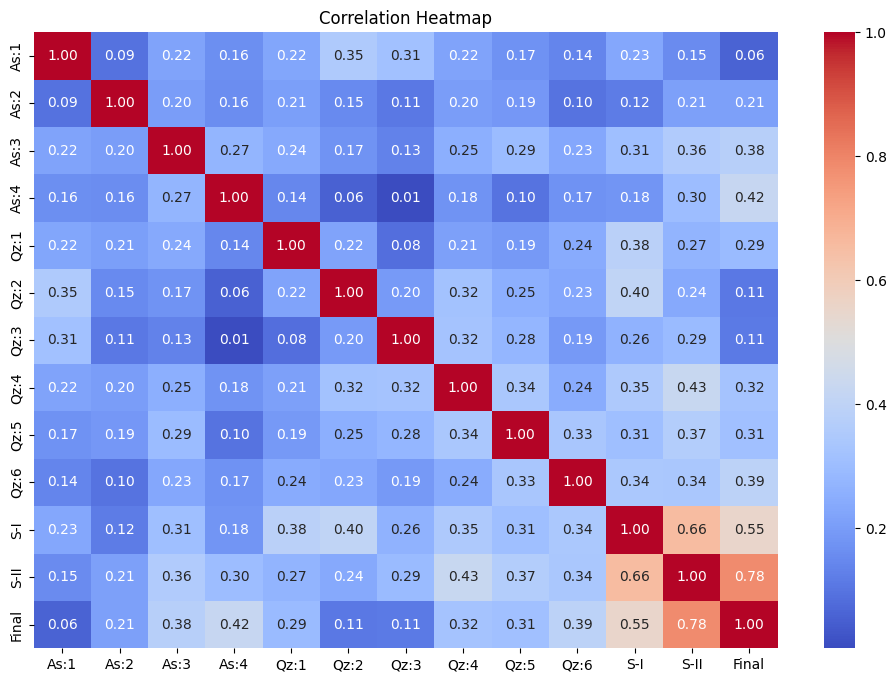

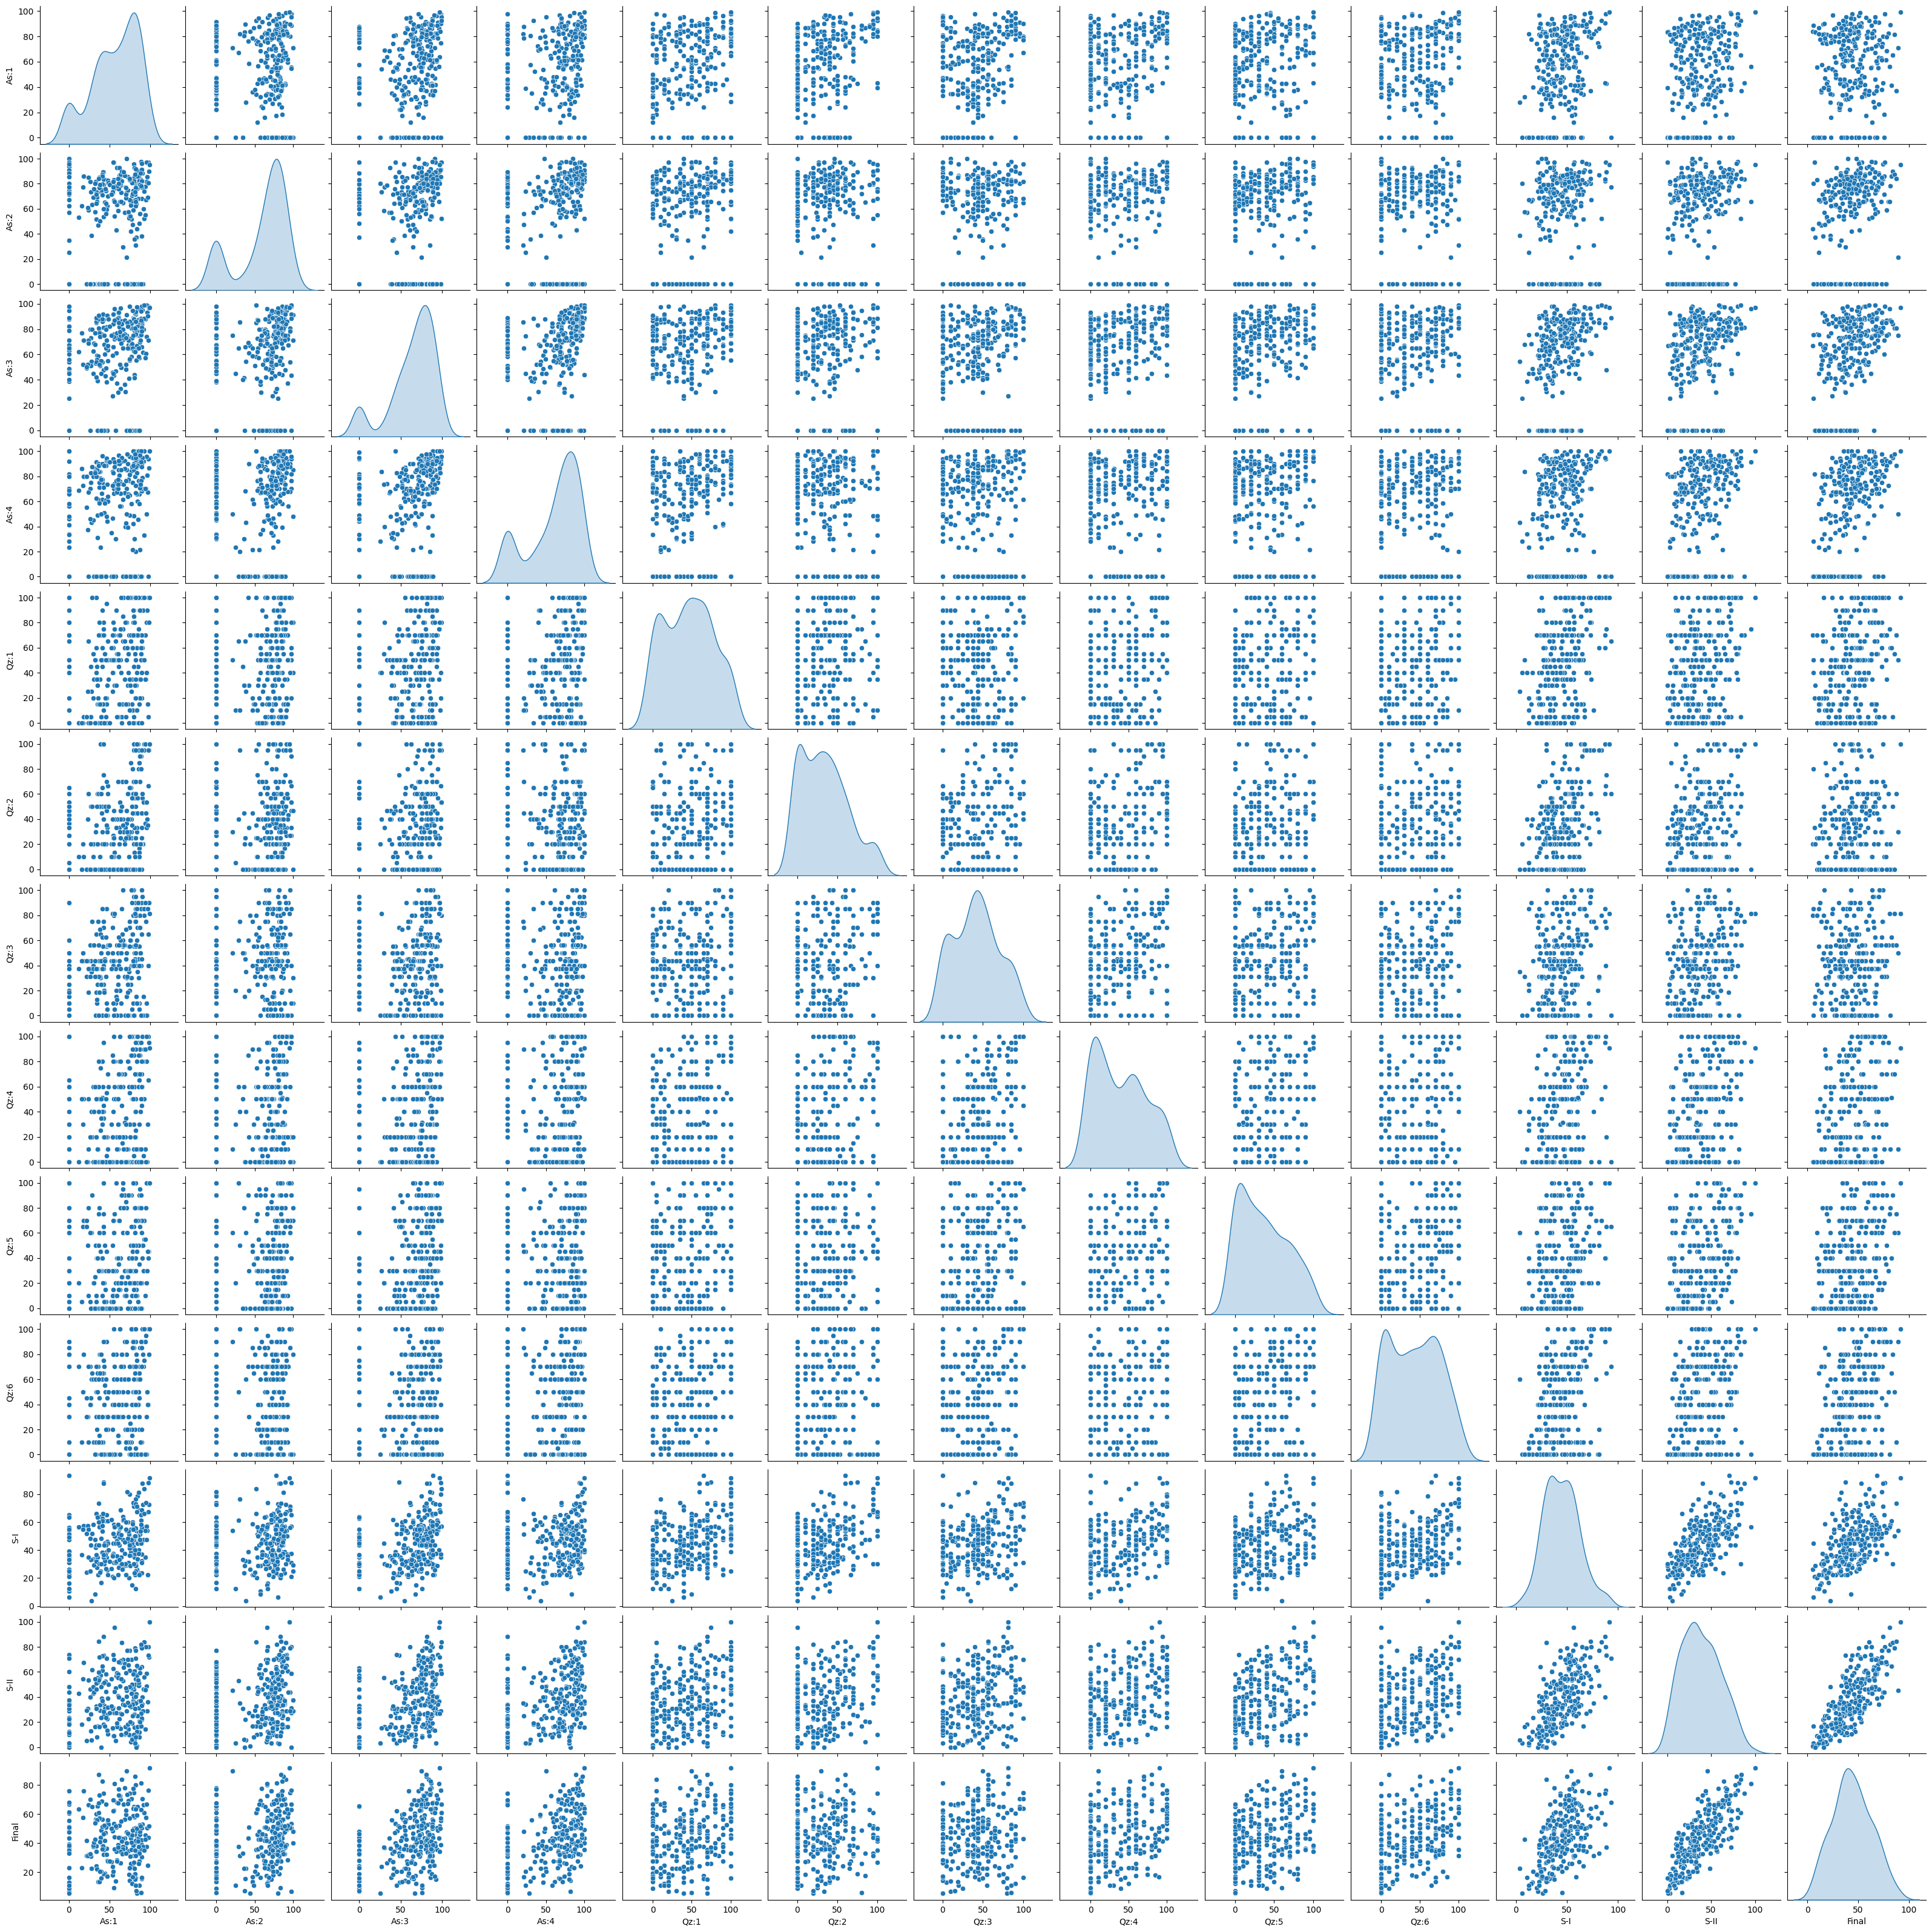

In [8]:
cols_to_use = [
    'As:1','As:2','As:3','As:4',
    'Qz:1','Qz:2','Qz:3','Qz:4','Qz:5','Qz:6',
    'S-I','S-II'
]

plt.figure(figsize=(12, 8))
sns.heatmap(df[cols_to_use + ["Final"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[cols_to_use + ["Final"]], diag_kind="kde")
plt.show()

# RQ1: Predicting Midterm I (S-I) Marks


RQ1: PREDICTING MIDTERM I (S-I) MARKS
Dataset size for RQ1: 254 rows
Features available before Midterm I: As:1, As:2, Qz:1, Qz:2

Feature Correlations with Midterm I (S-I)
S-I     1.000000
Qz:2    0.402652
Qz:1    0.383878
As:1    0.231439
As:2    0.115477
Name: S-I, dtype: float64

MODEL 1: Multiple Linear Regression (Raw Features)

Train set size: 203
Test set size: 51

Coefficients:
  As:1: 0.0279
  As:2: -0.0173
  Qz:1: 0.1793
  Qz:2: 0.1924
  Intercept: 29.0664

Training Metrics:
  R²: 0.2636
  RMSE: 14.8867
  MAE: 11.8917
  Adjusted R²: 0.2488

Testing Metrics:
  R²: 0.2059
  RMSE: 14.4453
  MAE: 12.0393
  Adjusted R²: 0.1368

MODEL 2: Multiple Linear Regression (Collapsed Features)

Coefficients:
  As_Mean: 0.0039
  Qz_Mean: 0.3762
  Intercept: 29.1564

Training Metrics:
  R²: 0.2606
  RMSE: 14.9170
  MAE: 11.9128
  Adjusted R²: 0.2532

Testing Metrics:
  R²: 0.2095
  RMSE: 14.4121
  MAE: 11.9780
  Adjusted R²: 0.1766

MODEL 3: Polynomial Regression (Degree 2 - Collapsed Featur

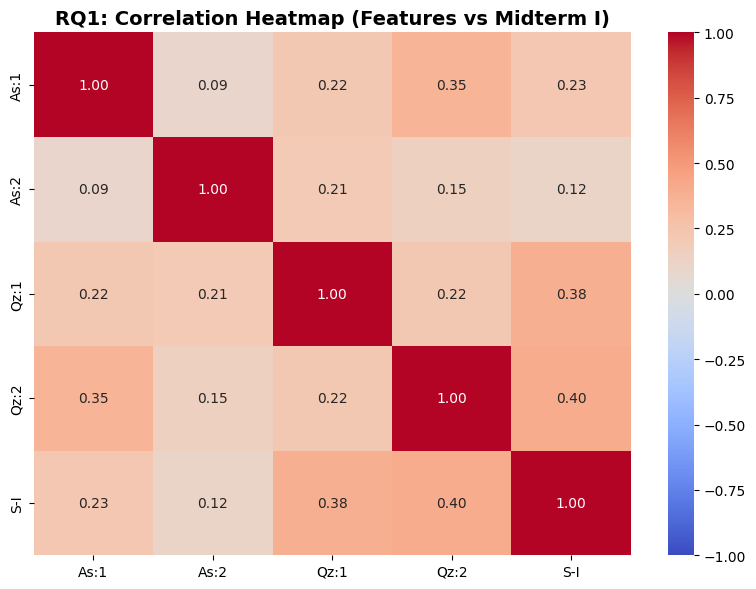

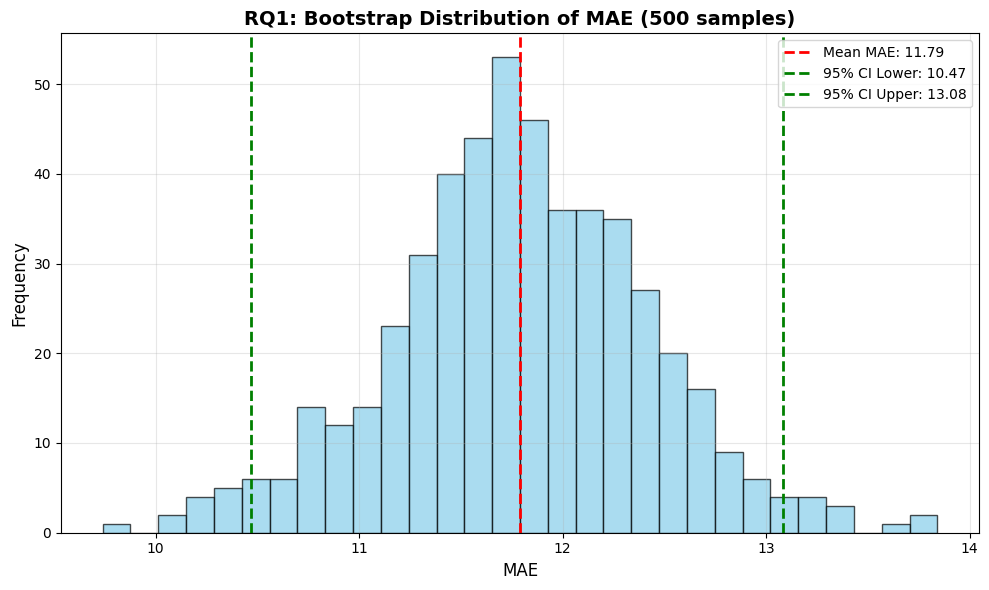

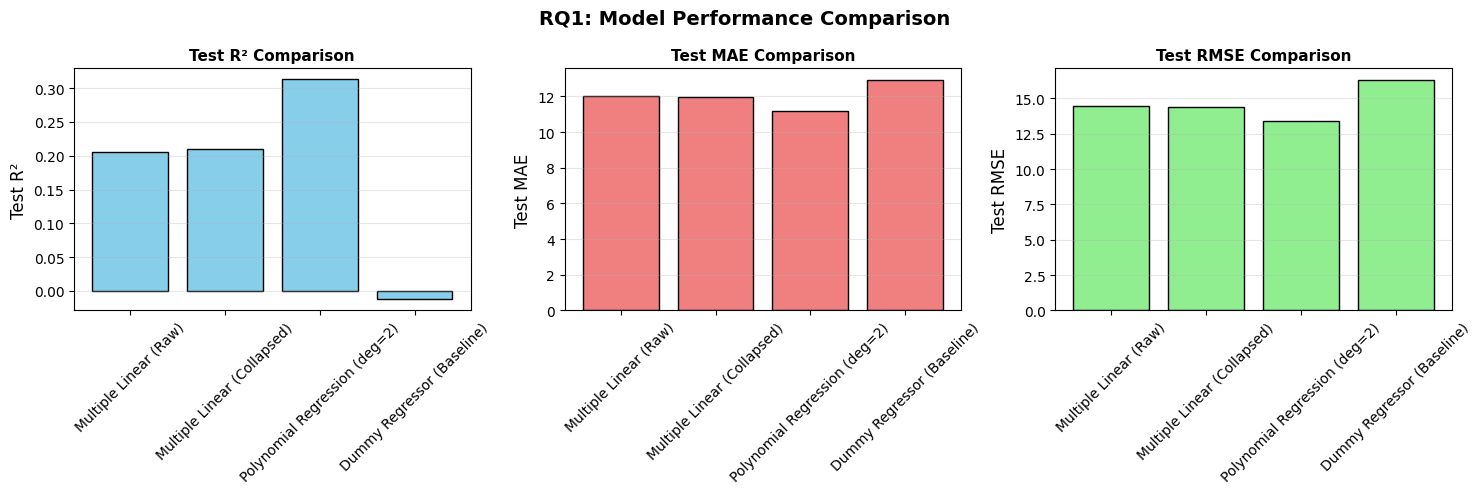

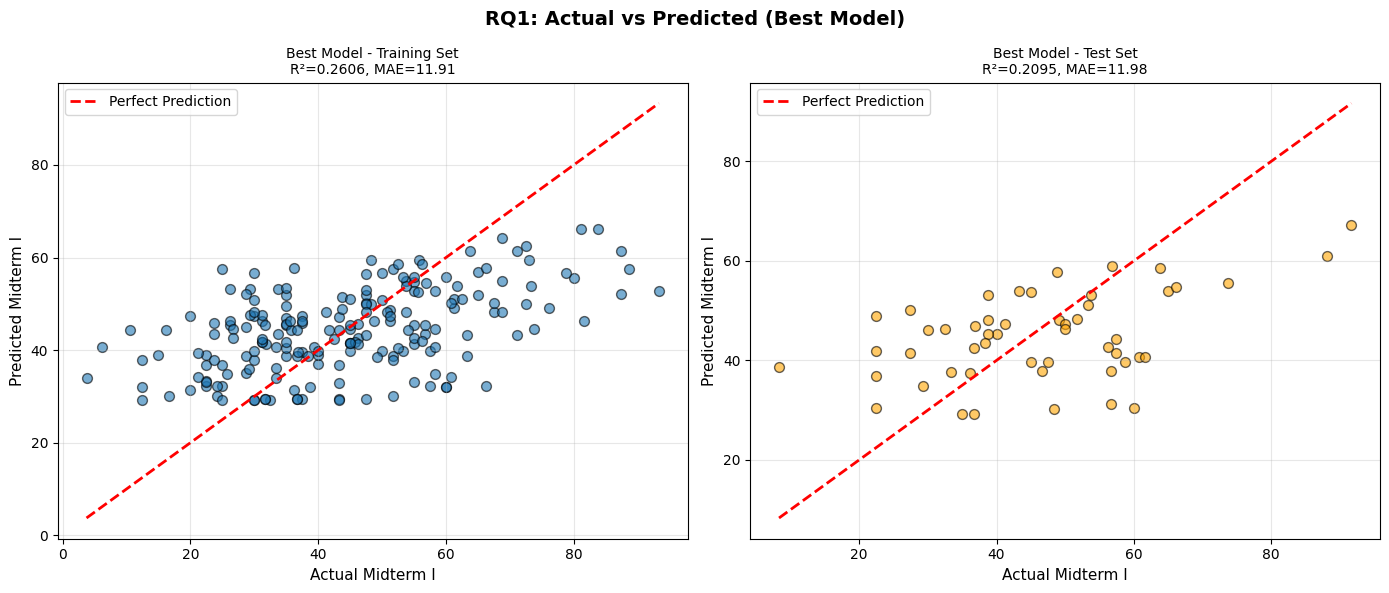


✅ RQ1 Analysis Complete!


In [9]:
# Helper Function
def calculate_metrics(y_true, y_pred, X_shape=None, dataset_name=""):
    """Calculate and print regression metrics"""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"  R²: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    
    if X_shape is not None:
        n = len(y_true)
        k = X_shape[1]
        if n > k + 1:
            adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
            print(f"  Adjusted R²: {adj_r2:.4f}")
    
    return {"R2": r2, "RMSE": rmse, "MAE": mae}

# ============================================================================
# RQ1: Predicting Midterm I (S-I) Marks
# ============================================================================
print("\n" + "="*70)
print("RQ1: PREDICTING MIDTERM I (S-I) MARKS")
print("="*70)

# Assumption: Before Midterm I, students had 2 assignments and 2 quizzes
df_rq1 = df.dropna(subset=['S-I']).copy()
print(f"Dataset size for RQ1: {len(df_rq1)} rows")
print(f"Features available before Midterm I: As:1, As:2, Qz:1, Qz:2")

# Check correlations
print("\n" + "="*70)
print("Feature Correlations with Midterm I (S-I)")
print("="*70)
corr_data = df_rq1[['As:1', 'As:2', 'Qz:1', 'Qz:2', 'S-I']].corr()['S-I'].sort_values(ascending=False)
print(corr_data)

# --------------------------
# MODEL 1: Multiple Linear Regression (Raw Features)
# --------------------------
print("\n" + "="*70)
print("MODEL 1: Multiple Linear Regression (Raw Features)")
print("="*70)

cols_model1_rq1 = ["As:1", "As:2", "Qz:1", "Qz:2"]
X1_rq1 = df_rq1[cols_model1_rq1]
y1_rq1 = df_rq1["S-I"]

X1_rq1_train, X1_rq1_test, y1_rq1_train, y1_rq1_test = train_test_split(
    X1_rq1, y1_rq1, test_size=0.20, random_state=42
)

print(f"\nTrain set size: {len(X1_rq1_train)}")
print(f"Test set size: {len(X1_rq1_test)}")

model1_rq1 = LinearRegression()
model1_rq1.fit(X1_rq1_train, y1_rq1_train)

y1_rq1_pred_train = model1_rq1.predict(X1_rq1_train)
y1_rq1_pred_test = model1_rq1.predict(X1_rq1_test)

print("\nCoefficients:")
for col, coef in zip(cols_model1_rq1, model1_rq1.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model1_rq1.intercept_:.4f}")

metrics1_rq1_train = calculate_metrics(y1_rq1_train, y1_rq1_pred_train, X1_rq1_train.shape, "Training")
metrics1_rq1_test = calculate_metrics(y1_rq1_test, y1_rq1_pred_test, X1_rq1_test.shape, "Testing")

# --------------------------
# MODEL 2: Multiple Linear Regression (Collapsed Features)
# --------------------------
print("\n" + "="*70)
print("MODEL 2: Multiple Linear Regression (Collapsed Features)")
print("="*70)

df_rq1["As_Mean"] = df_rq1[["As:1", "As:2"]].mean(axis=1)
df_rq1["Qz_Mean"] = df_rq1[["Qz:1", "Qz:2"]].mean(axis=1)

cols_model2_rq1 = ["As_Mean", "Qz_Mean"]
X2_rq1 = df_rq1[cols_model2_rq1]
y2_rq1 = df_rq1["S-I"]

X2_rq1_train, X2_rq1_test, y2_rq1_train, y2_rq1_test = train_test_split(
    X2_rq1, y2_rq1, test_size=0.20, random_state=42
)

model2_rq1 = LinearRegression()
model2_rq1.fit(X2_rq1_train, y2_rq1_train)

y2_rq1_pred_train = model2_rq1.predict(X2_rq1_train)
y2_rq1_pred_test = model2_rq1.predict(X2_rq1_test)

print("\nCoefficients:")
for col, coef in zip(cols_model2_rq1, model2_rq1.coef_):
    print(f"  {col}: {coef:.4f}")
print(f"  Intercept: {model2_rq1.intercept_:.4f}")

metrics2_rq1_train = calculate_metrics(y2_rq1_train, y2_rq1_pred_train, X2_rq1_train.shape, "Training")
metrics2_rq1_test = calculate_metrics(y2_rq1_test, y2_rq1_pred_test, X2_rq1_test.shape, "Testing")

# --------------------------
# MODEL 3: Polynomial Regression (degree=2)
# --------------------------
print("\n" + "="*70)
print("MODEL 3: Polynomial Regression (Degree 2 - Collapsed Features)")
print("="*70)

# Use collapsed features for polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X3_rq1_poly_train = poly.fit_transform(X2_rq1_train)
X3_rq1_poly_test = poly.transform(X2_rq1_test)

model3_rq1 = LinearRegression()
model3_rq1.fit(X3_rq1_poly_train, y2_rq1_train)

y3_rq1_pred_train = model3_rq1.predict(X3_rq1_poly_train)
y3_rq1_pred_test = model3_rq1.predict(X3_rq1_poly_test)

print(f"\nPolynomial features created: {poly.get_feature_names_out(cols_model2_rq1)}")
print(f"Number of features: {X3_rq1_poly_train.shape[1]}")

metrics3_rq1_train = calculate_metrics(y2_rq1_train, y3_rq1_pred_train, X3_rq1_poly_train.shape, "Training")
metrics3_rq1_test = calculate_metrics(y2_rq1_test, y3_rq1_pred_test, X3_rq1_poly_test.shape, "Testing")

# --------------------------
# MODEL 4: Dummy Baseline Regressor
# --------------------------
print("\n" + "="*70)
print("MODEL 4: Dummy Baseline Regressor (Mean Strategy)")
print("="*70)

dummy_rq1 = DummyRegressor(strategy='mean')
dummy_rq1.fit(X2_rq1_train, y2_rq1_train)

y_dummy_rq1_train = dummy_rq1.predict(X2_rq1_train)
y_dummy_rq1_test = dummy_rq1.predict(X2_rq1_test)

metrics_dummy_rq1_train = calculate_metrics(y2_rq1_train, y_dummy_rq1_train, None, "Training")
metrics_dummy_rq1_test = calculate_metrics(y2_rq1_test, y_dummy_rq1_test, None, "Testing")

# --------------------------
# COMPARISON TABLE
# --------------------------
print("\n" + "="*70)
print("COMPARISON TABLE - RQ1: Midterm I Prediction")
print("="*70)

comparison_rq1 = pd.DataFrame({
    'Model': [
        'Multiple Linear (Raw)',
        'Multiple Linear (Collapsed)',
        'Polynomial Regression (deg=2)',
        'Dummy Regressor (Baseline)'
    ],
    'Train R²': [
        metrics1_rq1_train['R2'],
        metrics2_rq1_train['R2'],
        metrics3_rq1_train['R2'],
        metrics_dummy_rq1_train['R2']
    ],
    'Test R²': [
        metrics1_rq1_test['R2'],
        metrics2_rq1_test['R2'],
        metrics3_rq1_test['R2'],
        metrics_dummy_rq1_test['R2']
    ],
    'Train MAE': [
        metrics1_rq1_train['MAE'],
        metrics2_rq1_train['MAE'],
        metrics3_rq1_train['MAE'],
        metrics_dummy_rq1_train['MAE']
    ],
    'Test MAE': [
        metrics1_rq1_test['MAE'],
        metrics2_rq1_test['MAE'],
        metrics3_rq1_test['MAE'],
        metrics_dummy_rq1_test['MAE']
    ],
    'Train RMSE': [
        metrics1_rq1_train['RMSE'],
        metrics2_rq1_train['RMSE'],
        metrics3_rq1_train['RMSE'],
        metrics_dummy_rq1_train['RMSE']
    ],
    'Test RMSE': [
        metrics1_rq1_test['RMSE'],
        metrics2_rq1_test['RMSE'],
        metrics3_rq1_test['RMSE'],
        metrics_dummy_rq1_test['RMSE']
    ]
})

print("\n", comparison_rq1.to_string(index=False))

# Identify best model
best_model_idx = comparison_rq1['Test R²'].idxmax()
best_model_name = comparison_rq1.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R² = {comparison_rq1.loc[best_model_idx, 'Test R²']:.4f}")
print(f"   Test MAE = {comparison_rq1.loc[best_model_idx, 'Test MAE']:.4f}")

# Check for overfitting/underfitting
print("\n" + "="*70)
print("Overfitting/Underfitting Analysis")
print("="*70)
for idx, model_name in enumerate(comparison_rq1['Model']):
    train_r2 = comparison_rq1.loc[idx, 'Train R²']
    test_r2 = comparison_rq1.loc[idx, 'Test R²']
    diff = train_r2 - test_r2
    
    print(f"\n{model_name}:")
    print(f"  Train R² - Test R² = {diff:.4f}")
    if diff > 0.1:
        print(f"  ⚠ Possible overfitting (large gap between train and test)")
    elif test_r2 < 0:
        print(f"  ⚠ Model performs worse than baseline (negative R²)")
    elif train_r2 < 0.3 and test_r2 < 0.3:
        print(f"  ⚠ Possible underfitting (low performance on both sets)")
    else:
        print(f"  ✓ Reasonable performance")

# --------------------------
# BOOTSTRAPPING ANALYSIS (FIXED - Using Correct Data)
# --------------------------
print("\n" + "="*70)
print("BOOTSTRAPPING ANALYSIS - RQ1 (Best Model: Collapsed Features)")
print("="*70)

# Use Model 2 (Collapsed Features) for bootstrapping
np.random.seed(42)
n_bootstrap = 500
bootstrap_maes_rq1 = []

print(f"Performing {n_bootstrap} bootstrap samples...")
for i in range(n_bootstrap):
    # Resample with replacement from CORRECT RQ1 training data
    indices = np.random.choice(len(X2_rq1_train), size=len(X2_rq1_train), replace=True)
    X_boot = X2_rq1_train.iloc[indices]
    y_boot = y2_rq1_train.iloc[indices]
    
    # Fit model on bootstrap sample
    boot_model = LinearRegression()
    boot_model.fit(X_boot, y_boot)
    
    # Predict on the bootstrap sample
    y_boot_pred = boot_model.predict(X_boot)
    
    # Calculate MAE
    mae_boot = mean_absolute_error(y_boot, y_boot_pred)
    bootstrap_maes_rq1.append(mae_boot)

# Calculate 95% confidence interval
bootstrap_maes_rq1 = np.array(bootstrap_maes_rq1)
ci_lower_rq1 = np.percentile(bootstrap_maes_rq1, 2.5)
ci_upper_rq1 = np.percentile(bootstrap_maes_rq1, 97.5)
mean_mae_rq1 = np.mean(bootstrap_maes_rq1)
std_mae_rq1 = np.std(bootstrap_maes_rq1)

print(f"\nBootstrap Results (500 samples):")
print(f"  Mean MAE: {mean_mae_rq1:.4f}")
print(f"  Std Dev MAE: {std_mae_rq1:.4f}")
print(f"  95% Confidence Interval: [{ci_lower_rq1:.4f}, {ci_upper_rq1:.4f}]")

print(f"\n📊 Interpretation:")
print(f"  We are 95% confident that the true MAE of the model lies between")
print(f"  {ci_lower_rq1:.2f} and {ci_upper_rq1:.2f} marks. This means the model's prediction")
print(f"  error for Midterm I is expected to be within this range.")

# --------------------------
# VISUALIZATIONS
# --------------------------

# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_rq1[cols_model1_rq1 + ["S-I"]].corr(), annot=True, fmt=".2f",
            cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("RQ1: Correlation Heatmap (Features vs Midterm I)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Bootstrap Distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_maes_rq1, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean_mae_rq1, color='red', linestyle='--', linewidth=2, label=f'Mean MAE: {mean_mae_rq1:.2f}')
plt.axvline(ci_lower_rq1, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {ci_lower_rq1:.2f}')
plt.axvline(ci_upper_rq1, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {ci_upper_rq1:.2f}')
plt.xlabel('MAE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('RQ1: Bootstrap Distribution of MAE (500 samples)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Model Comparison Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics_to_plot = ['Test R²', 'Test MAE', 'Test RMSE']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    axes[idx].bar(comparison_rq1['Model'], comparison_rq1[metric], color=color, edgecolor='black')
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} Comparison', fontsize=11, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('RQ1: Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Actual vs Predicted for Best Model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training
axes[0].scatter(y2_rq1_train, y2_rq1_pred_train, alpha=0.6, edgecolor='black', s=50)
axes[0].plot([y2_rq1_train.min(), y2_rq1_train.max()],
             [y2_rq1_train.min(), y2_rq1_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Midterm I', fontsize=11)
axes[0].set_ylabel('Predicted Midterm I', fontsize=11)
axes[0].set_title(f'Best Model - Training Set\nR²={metrics2_rq1_train["R2"]:.4f}, MAE={metrics2_rq1_train["MAE"]:.2f}', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Testing
axes[1].scatter(y2_rq1_test, y2_rq1_pred_test, alpha=0.6, color='orange', edgecolor='black', s=50)
axes[1].plot([y2_rq1_test.min(), y2_rq1_test.max()],
             [y2_rq1_test.min(), y2_rq1_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Midterm I', fontsize=11)
axes[1].set_ylabel('Predicted Midterm I', fontsize=11)
axes[1].set_title(f'Best Model - Test Set\nR²={metrics2_rq1_test["R2"]:.4f}, MAE={metrics2_rq1_test["MAE"]:.2f}', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.suptitle('RQ1: Actual vs Predicted (Best Model)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ RQ1 Analysis Complete!")

# RQ2: Predicting Midterm II (S-II) Marks